# **Homework 4**



Name:

I collaborated with: 



In [1]:
# Dataset: Plant species richness in ephemeral and permanent wetlands in Wisconsin, 2013

%matplotlib inline
import numpy as np
import matplotlib as mat
import seaborn as sns
import matplotlib.pyplot as plt

plant_eph = np.array([34,51,20,47,22,19,24,18,33,45,36,42,30,25,44,33,47,35,51,15,24,13,25,32,49,28,37,17,13,32,24,18,22])
plant_perm = np.array([31,40,43,37,23,45,53,46,44,25,47,34,41,31,37,34,42,37,14,29,18,15,14,28])

# Diarrhea dataset from Figueroa-Quintanilla and others (1993)
control = [131,178,127,403,413,60,859,247,278,66,210,237,105,79,307,90,244,165,59,420,159,105,667,551,61,351,59,197,173,62,386,276,85,381,567,240,539,480,157,346,69,1101,176,193,493,113,88,55,373,73,99,234,134,57,66,84,135,371,56,199,229,384,392,490,354,162,224,62,56,210,187,141,114,1677,55,615,55,193,68,590,154,130,559,75]
treatment = [237,110,106,1099,65,74,156,60,98,234,105,79,258,61,60,196,57,55,55,62,247,121,76,365,69,245,75,236,157,100,55,185,122,126,73,133,86,430,127,56,113,55,67,116,361,168,427,570,306,107,57,231,60,398,367,137,58,66,968,78,229,69,155,115,71,55,88,1025,108,102,371,163,349,69,208,91,84,100,61,94,175,57,356,144,99]

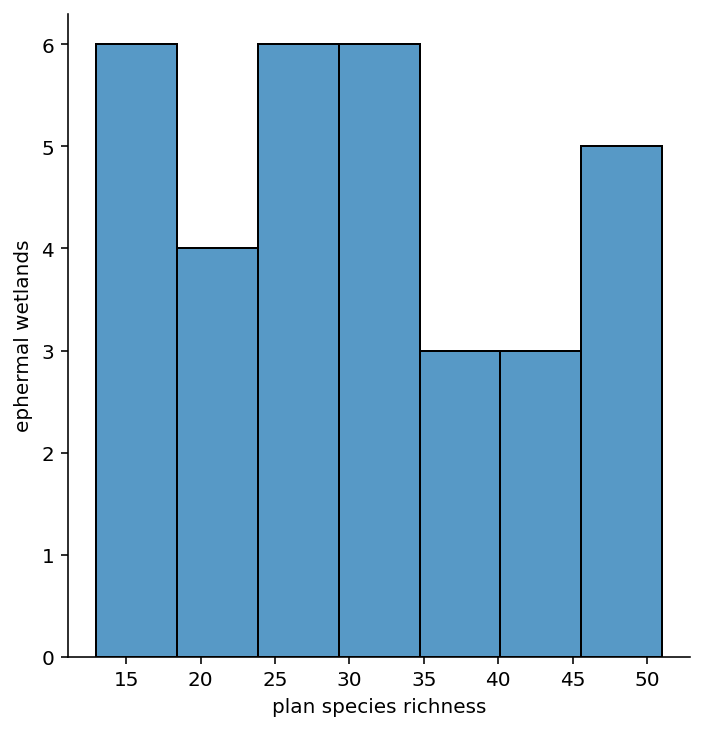

In [8]:
#3a) Visualize data by group.
p = sns.displot(data=plant_eph)
p.set(xlabel = 'plan species richness')
p.set(ylabel = 'ephermal wetlands')


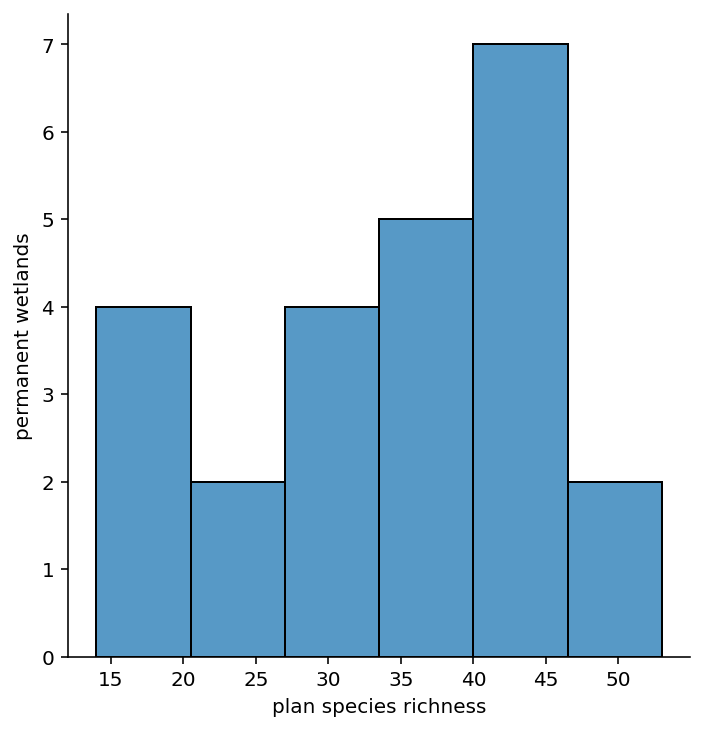

In [9]:
p = sns.displot(data=plant_perm)
p.set(xlabel = 'plan species richness', ylabel = 'permanent wetlands')

In [0]:
#3b) Describe the appropriate null hypothesis, measure to describe the groups, measure to compare the groups, box model, and sample size for the study.
#The appropriate null hypothesis is that there is no significant difference in plant species richness between ephermal and permanent wetlands. 
#The appropriate measure to describe the groups is by using a histogram, as this allows us to better view the spread of the data including the peaks, skew, and modality. In both graphs, there are multiple peaks. This allows us to use the median as the best way to compare the groups. 
#The appropriate box model to use would be that which seperates the data into two box models.

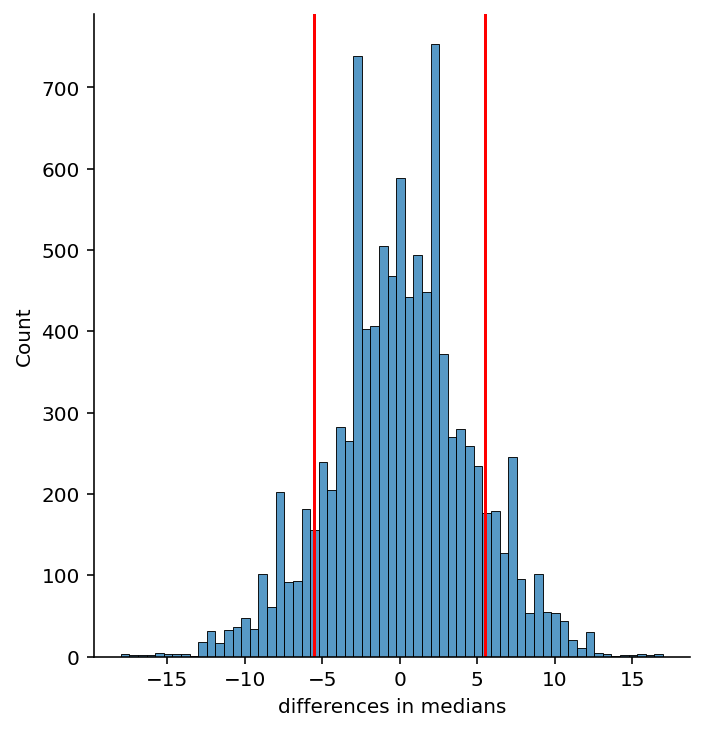

In [29]:
#c) Calculate p-value for NHST using the appropriate method. Make sure you specify which method you’re using from the list in #2 above. Include your histogram ofsimulation results with the observed result indicated. Comment on any lines that are different from the standard Big Box method. If you are comparing three or more groups, make sure you determine between which two groups any difference occurs.

med1 = np.median(plant_eph)
med1
med2 = np.median(plant_perm)
med2
Mobs = med1-med2
Mobs

boxmodel = np.concatenate([plant_eph, plant_perm])
boxmodel

#simulations:
simulations = range(10000)
samplesize1 = len(plant_eph)
samplesize2 = len(plant_perm)

difflist = []

for i in simulations:
    resample1 = np.random.choice(boxmodel, samplesize1) #sampling from boxmodel, we want the number of samples in plant_eph samples
    resample2 = np.random.choice(boxmodel, samplesize2)

    #finding the medians
    m1 = np.median(resample1)
    m1
    m2 = np.median(resample2)
    m2
    
    #difference between medians
    d = m1-m2
    difflist.append(d)
    
p=sns.displot(data=difflist)
p.set(xlabel = 'differences in medians')

plt.axvline(Mobs, color='r')
plt.axvline(-Mobs, color='r')

In [30]:
darray = np.array(difflist) #list --> array
extreme_right = np.sum(darray >= Mobs)
#finds one-tailed pvalue:
pvalue = extreme_right / len(darray)
pvalue

extreme_left = np.sum(darray <= -Mobs)
extreme_total = extreme_left + extreme_right
pvalue2 = extreme_total / len(darray)
pvalue2

1.7989

[  -22.5  , 1.0 ]


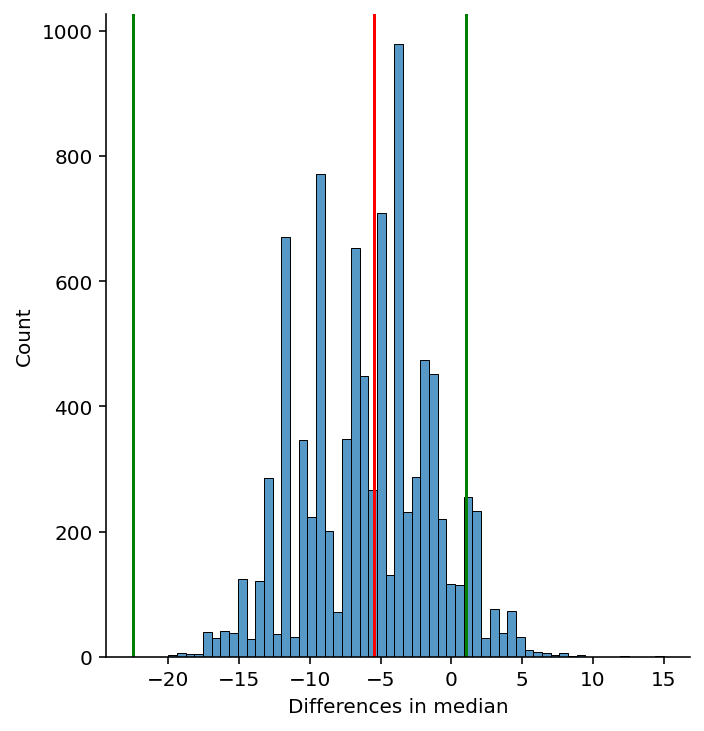

In [40]:
#d) Calculate 99% confidence interval for the effect size(s) using the appropriate method if possible.
sorted_d = sorted( difflist )
#FIND 50TH AND 99 PERCENTILE
Mlower = sorted_d[49]
Mupper = sorted_d[9949]

Mobs2 = np.median(difflist)

#FIND CI
lowerbound = 2 * Mobs - Mupper
higherbound = 2 * Mobs - Mlower

print('[ ',lowerbound,' ,',higherbound,']')

#PLOT DISTRIBUTION
p = sns.displot( data = dlist )
p.set( xlabel = 'Differences in median' )
plt.axvline( Mobs , color = 'r' )
plt.axvline( lowerbound , color = 'g' )
plt.axvline( higherbound , color = 'g' )

In [0]:
#e) Interpret your results from steps (c) and (d) in the context of the study.
# Becuase our calculated p-value is greater than the alpha value (0.5), our findings are not significant, meaning we cannot reject the null hypothesis. 

In [0]:
#f) Can we analyze the data in this study as paired data? If not, describe a paired design to study this research question.
# No we cannot analyze the data in this study as paired data because our null hypothesis cannot be rejected due to the large p-value. A paired design we could use to study this question would be to observe this data from the same wetland when it is dry versus when it is wet to see the differences (if any) of plant species richness. 

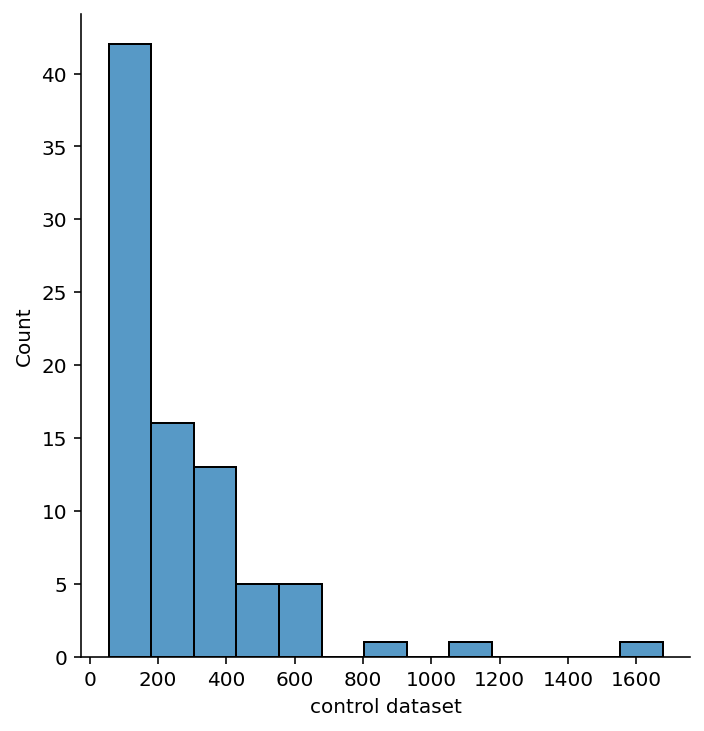

In [2]:
#4a)
p = sns.displot(data=control)
p.set(xlabel = 'control dataset')

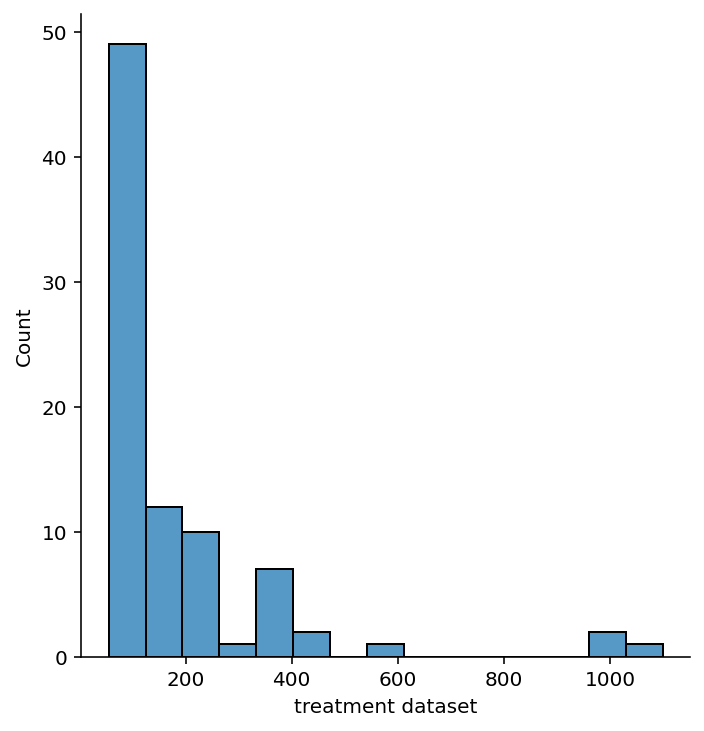

In [3]:
p = sns.displot(data=treatment)
p.set(xlabel = 'treatment dataset')

In [0]:
#4b)
#Describe the appropriate null hypothesis, measure to describe the groups, measure to compare the groups, box model, and sample size for the study.
#The appropriate null hypothesis is that there is no significant difference between the control and the treatment groups.
#The appropriate measure to describe the groups is by using a histogram, as this allows us to better view the spread of the data including the peaks, skew, and modality. In both graphs, there is a right skew. This indicates that we should use the median as the best way to compare the groups. 
#The appropriate box model to use would be that which seperates the data into two box models, as this allows us to find out if the data can be paired or not. 

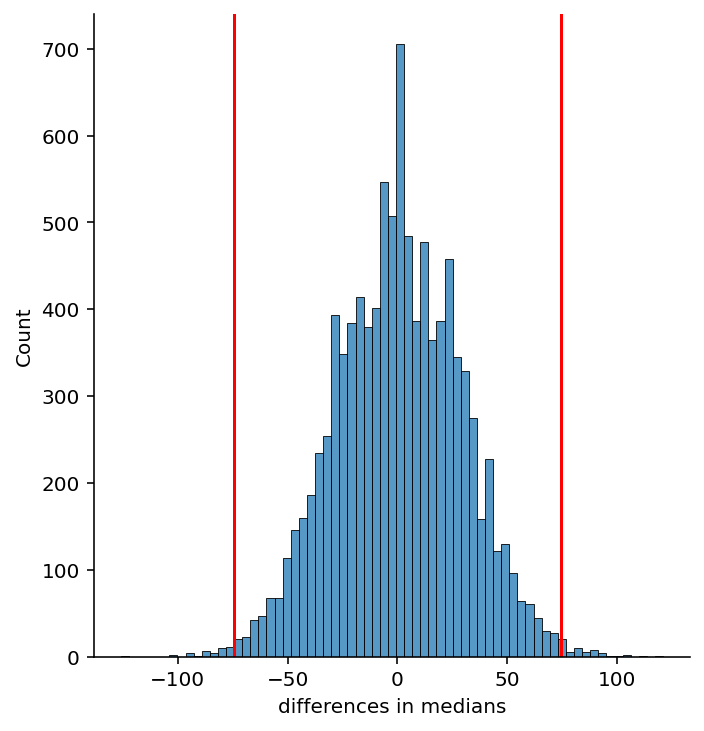

In [4]:
#4c
med1 = np.median(control)
med1
med2 = np.median(treatment)
med2
Mobs = med1-med2
Mobs

boxmodel = np.concatenate([control, treatment])
boxmodel

#simulations:
simulations = range(10000)
samplesize1 = len(control)
samplesize2 = len(treatment)

difflist = []

for i in simulations:
    resample1 = np.random.choice(boxmodel, samplesize1) #sampling from boxmodel, we want the number of samples in plant_eph samples
    resample2 = np.random.choice(boxmodel, samplesize2)

    #finding the medians
    m1 = np.median(resample1)
    m1
    m2 = np.median(resample2)
    m2
    
    #difference between medians
    d = m1-m2
    difflist.append(d)
    
p=sns.displot(data=difflist)
p.set(xlabel = 'differences in medians')

plt.axvline(Mobs, color='r')
plt.axvline(-Mobs, color='r')

In [5]:
#finding p-value
darray = np.array(difflist) #list --> array
extreme_right = np.sum(darray >= Mobs)
#finds one-tailed pvalue:
pvalue = extreme_right / len(darray)
pvalue

extreme_left = np.sum(darray <= -Mobs)
extreme_total = extreme_left + extreme_right
pvalue2 = extreme_total / len(darray)
pvalue2

0.0091

[  74.5  , 221.0 ]


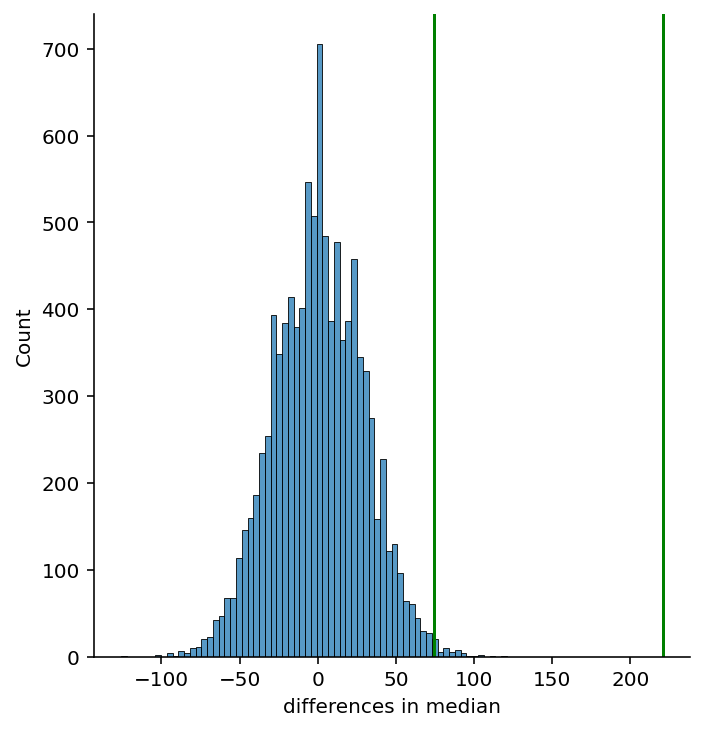

In [7]:
#4d)
sorted_d = sorted( difflist )
#FIND 50TH AND 99 PERCENTILE
Mlower = sorted_d[49]
Mupper = sorted_d[9949]

Mobs2 = np.median(difflist)

#FIND CI
lowerbound = 2 * Mobs - Mupper
higherbound = 2 * Mobs - Mlower

print('[ ',lowerbound,' ,',higherbound,']')

#PLOT DISTRIBUTION
p = sns.displot( data = difflist )
p.set( xlabel = 'differences in median' )
plt.axvline( Mobs , color = 'r' )
plt.axvline( lowerbound , color = 'g' )
plt.axvline( higherbound , color = 'g' )

In [0]:
#4e)
#Becuase our calculated p-value is less than the alpha value (0.5), our findings are significant, meaning we can reject the null hypothesis and declare that there is, in fact, a proven difference between the control and treatment group. 

In [0]:
Cold durations for your friends taking the remedy are 3 days.
Cold durations in days for your friends taking the placebo are 

In [13]:
#5a)
control = [5.3, 3.6, 4.3, 5.7, 6.7]
treatment = [3.5, 2.3, 4.7,1.5, 3.7]

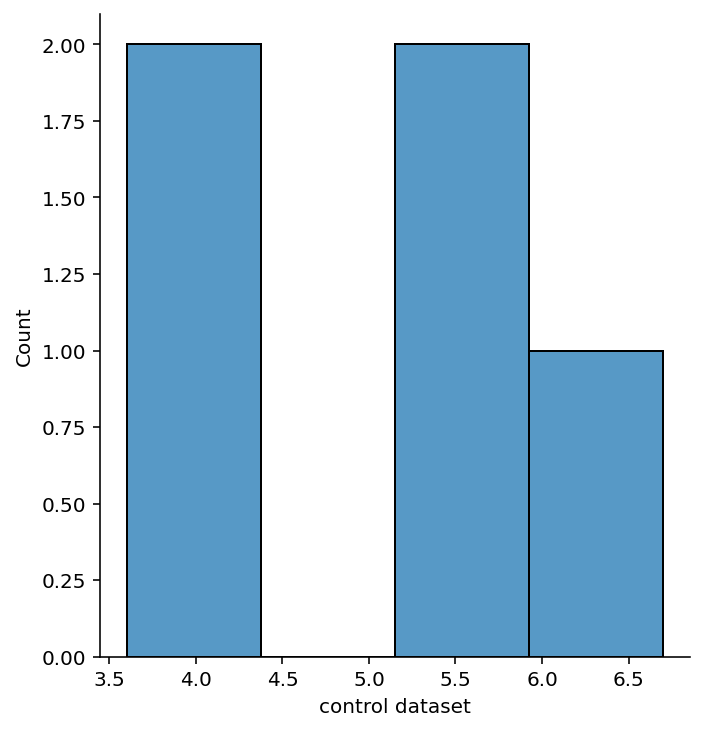

In [10]:
p = sns.displot(data=control)
p.set(xlabel = 'control dataset')

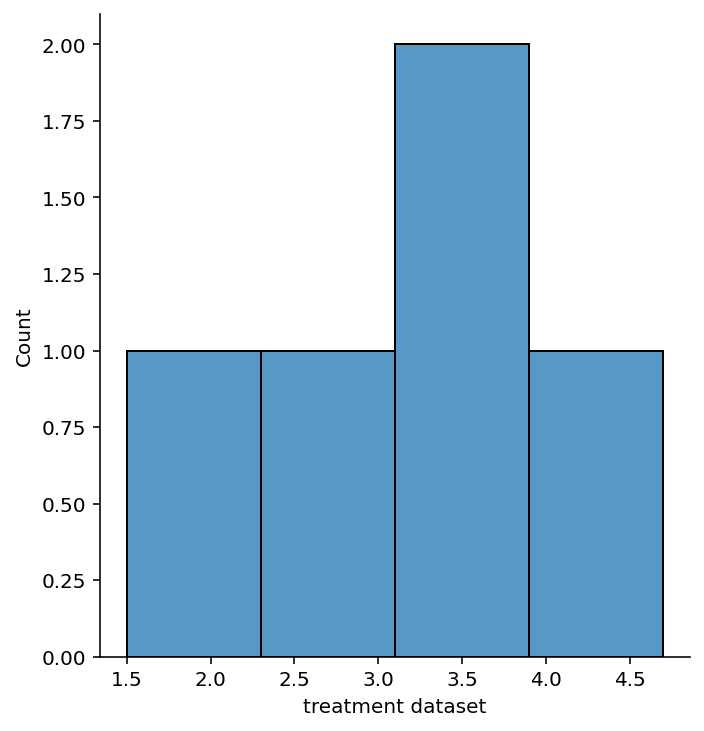

In [11]:
p = sns.displot(data=treatment)
p.set(xlabel = 'treatment dataset')

In [0]:
#5b)
#The appropriate null hypothesis is that there is no significant difference between the control and the treatment groups.
#The appropriate measure to describe the groups is by using a histogram, as this allows us to better view the spread of the data including the peaks, skew, and modality. In both graphs, there is a right skew. This indicates that we should use the median as the best way to compare the groups. 
#The appropriate box model to use would be that which seperates the data into two box models, as this allows us to find out if the data can be paired or not. 

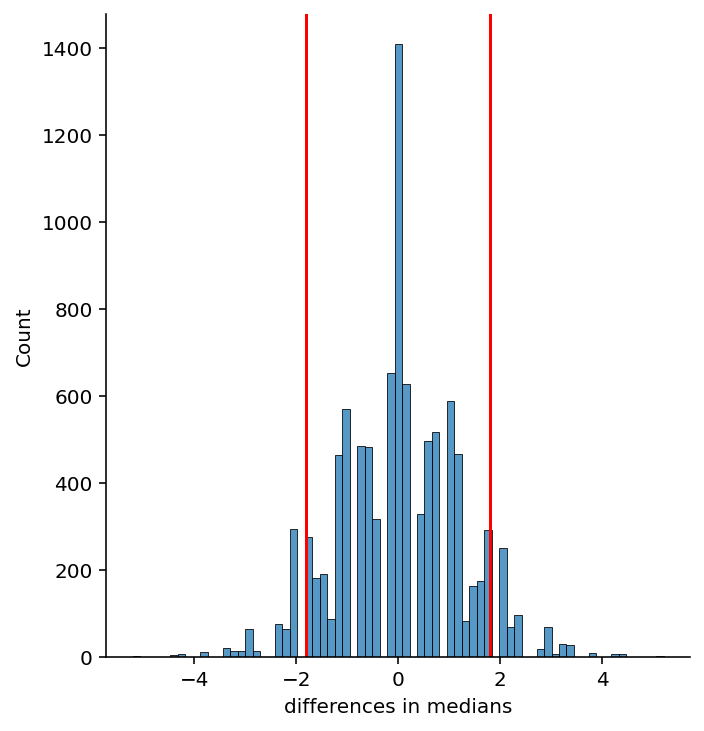

In [14]:
#5c)
med1 = np.median(control)
med1
med2 = np.median(treatment)
med2
Mobs = med1-med2
Mobs

boxmodel = np.concatenate([control, treatment])
boxmodel

#simulations:
simulations = range(10000)
samplesize1 = len(control)
samplesize2 = len(treatment)

difflist = []

for i in simulations:
    resample1 = np.random.choice(boxmodel, samplesize1) #sampling from boxmodel, we want the number of samples in plant_eph samples
    resample2 = np.random.choice(boxmodel, samplesize2)

    #finding the medians
    m1 = np.median(resample1)
    m1
    m2 = np.median(resample2)
    m2
    
    #difference between medians
    d = m1-m2
    difflist.append(d)
    
p=sns.displot(data=difflist)
p.set(xlabel = 'differences in medians')

plt.axvline(Mobs, color='r')
plt.axvline(-Mobs, color='r')

In [15]:
#finding p-value
darray = np.array(difflist) #list --> array
extreme_right = np.sum(darray >= Mobs)
#finds one-tailed pvalue:
pvalue = extreme_right / len(darray)
pvalue

extreme_left = np.sum(darray <= -Mobs)
extreme_total = extreme_left + extreme_right
pvalue2 = extreme_total / len(darray)
pvalue2

0.1388

[  0.1999999999999993  , 6.8 ]


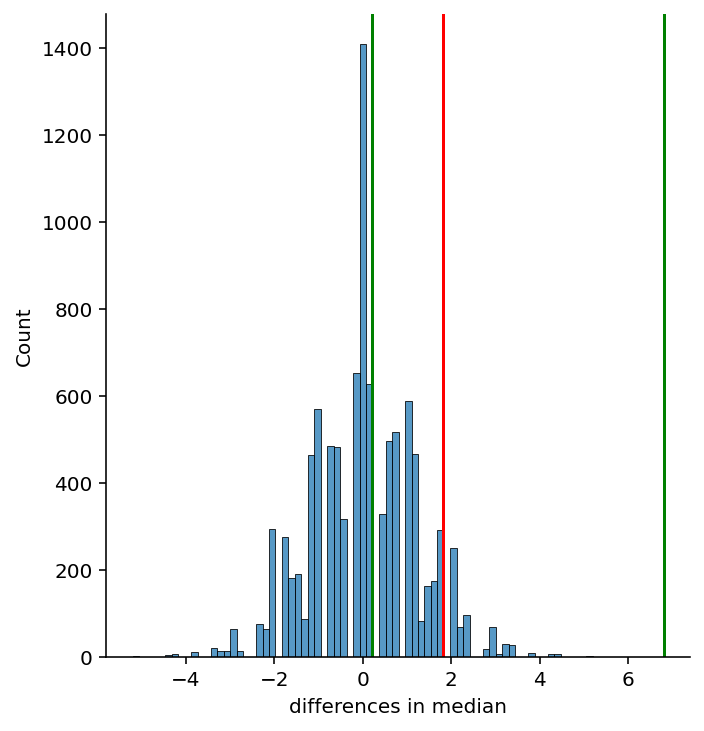

In [16]:
#5d)
sorted_d = sorted( difflist )
#FIND 50TH AND 99 PERCENTILE
Mlower = sorted_d[49]
Mupper = sorted_d[9949]

Mobs2 = np.median(difflist)

#FIND CI
lowerbound = 2 * Mobs - Mupper
higherbound = 2 * Mobs - Mlower

print('[ ',lowerbound,' ,',higherbound,']')

#PLOT DISTRIBUTION
p = sns.displot( data = difflist )
p.set( xlabel = 'differences in median' )
plt.axvline( Mobs , color = 'r' )
plt.axvline( lowerbound , color = 'g' )
plt.axvline( higherbound , color = 'g' )

In [0]:
#5e) #Becuase our calculated p-value is more than the alpha value (0.5), our findings are not significant, meaning we cannot reject the null hypothesis and declare that there is, in fact, no fully proven difference between the control and treatment group.

In [0]:
#5f) Something that the friend could do differently is to test the same friends who have the same sicknesses, so that the test is more accurate and attuned to the actual medicine/treatment being used. To specify, the same diseases should be tested to determine if the length of the cold is due to the type of cold or effect of the medicine versus the placebo treatment used. This will allow a more neutral and accurate test.